# $\color{Violet}{\text{Week 9: Visualizing Quantum circuits in Qiskit}}$

`Qiskit` is one of the most well-dcoumented and universally used Python packages in the field of quantum computing. It has a varity of subfunctions that allow for easy circuit design/visualization, connectivity to real quantum computers, and quantum error analysis. In this homework, we will focus on practicing using `Qiskit` to contruct and visualize quantum circuits and simulate the final measured states of qubits passing through them.

IBM Qunatum has produced a free interface which allows you to manually create these circuits, run them on IBM quantum computers, and even produces code to replicate them here! Use the IBM Qunatum interface alongside this homework assignment. Replicate each circuit in IBM Quantum and compare your result with the code. You will need to make an account to run your circuit on an IBM quantum computer.

IBM Quantum: https://quantum.ibm.com/composer/files/e326d7d40aa340f043d495be3ddeec3c3f192de8a65e55fef2797f2199cc94f9

### Contructing a Single-Qubit Circuit

Let's contruct a single-qubit circuit so we can explore the gates availble in Qiskit's base package simply.

In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=f35491619dfbeae74536a55087fff3cec69fe701bad8449e742303abe51d7739
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.8/18.8 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit #This is a subclass of qiskit
from qiskit import QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
import matplotlib as mpl
import matplotlib.pyplot as plt

from qiskit_aer import Aer
from qiskit.quantum_info import Statevector

#### Circuit design start here

In [ ]:
single_qubit = QuantumCircuit(1) #Generate a single-qubit circuit. We cannot use any two-qubit gates if we only have one qubit.
#Let's draw what we have so far.
single_qubit.draw()

q:

In [ ]:
single_qubit.measure_all() #Measure a probabilistic, collapsed final state the qubit should be in after passing through the circuit. Since this qubit is not in a superposition state, it has a 100% chance of collapsing into the initialized state.
single_qubit.draw()

░ ┌─┐
     q: ─░─┤M├
         ░ └╥┘
meas: 1/════╩═
            0

Oh, it's just a q for qubit in state |0⟩. This is because we haven't added any logic gates (operators) to the circuit. So, it's less of a circuit and just a qubit standing alone. In this ideal situation, this qubit is not interacting with the environment, so it's just sitting there existing. For instance, think of it as a single electron with some undefined spin vector existing in space. Let's change that - let's add some single-qubit operators, starting with one of the most basic. We can also make the diagram a little more pretty by adding `output="mpl"` to the `.draw()` attribute.

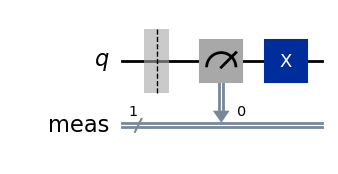

In [ ]:
#At this point, make sure you've commented out the code block above and rerun all blocks dictating the circuit design; Qiskit builds the circuit further after each command is called on that circuit. Otherwise, it'll misplace a measurement meter in your circuit.
single_qubit.x(0)
single_qubit.draw(output="mpl")

In [ ]:
#This part I took instruction from https://quantumcomputing.stackexchange.com/questions/24031/how-to-get-probabilities-from-a-simulator-without-sampling-for-a-qiskit-circuit

#Simulate using Qiskit Aer; what is the probability the qubit will now come out of the x-gate as |0⟩ OR |1⟩ at this point in the circuit?
backend = Aer.get_backend('statevector_simulator')
outputstate = backend.run(single_qubit, shots=1).result().get_statevector()
probs = Statevector(outputstate).probabilities()

print(probs)

[0. 1.]


The probabilites displaced in `probs` indicate the likelyhood that the qubit at the end of this circuit will collapse into the |0⟩ state (first value of `probs`) or the |1⟩ state (second value of `probs`) upon measurement. Notice that in this simulated measurement, the state of |q⟩ changed from |0⟩ to |1⟩. This is because `.x(0)` enacted a Pauli x operator on |q⟩, which we learned in lecture acts as a bit-flip/not gate. That is, the state of the qubit (here, automatically initialized as |1⟩), has flipped 180 degrees along the z-axis (around the x-axis).

Let's add more gates! Do make sure you rerun the circuit design from the very start again - otherwise it'll compile on itself if you re-run out of order. One way to get around this is `Qiskit`'s `.append()`, but for complexity purposes, we will simply continue to rerun this code.

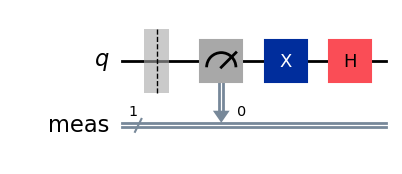

In [ ]:
#Let's apply a Hadamard gate and re-measure the collapse probabilities.
single_qubit.h(0)
#single_qubit.measure_all()
single_qubit.draw(output="mpl")

In [ ]:
#Simulate using Qiskit Aer; what is the probability the qubit will now come out of the x-gate as |0⟩ OR |1⟩ at this point in the circuit?
backend = Aer.get_backend('statevector_simulator')
outputstate = backend.run(single_qubit, shots=1).result().get_statevector()
probs = Statevector(outputstate).probabilities()

print(probs)

[0.5 0.5]


After operating the Hadamard gate and re-measuring our state probabilities, we see there is a 50% chance the qubit will collapse to state |0⟩ and a 50% chance it'll collpase to |1⟩. Why? This is because the Hadamard gate transforms our |1⟩ state to a superposition of |0⟩ and |1⟩. In fact, it is in the state $\frac{|0⟩+|1⟩}{\sqrt{2}}$, which means it's equally likely to collapse either way. What happens if we add a third Hadamard gate? Remember to re-run the circuit from the start.

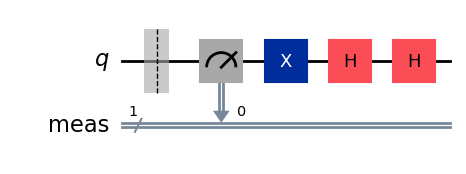

In [ ]:
#Let's apply a Hadamard gate
single_qubit.h(0)
#single_qubit.measure_all()
single_qubit.draw(output="mpl")

In [ ]:
#Simulate using Qiskit Aer; what is the probability the qubit will now come out of the x-gate as |0⟩ OR |1⟩ at this point in the circuit?
backend = Aer.get_backend('statevector_simulator')
outputstate = backend.run(single_qubit, shots=1).result().get_statevector()
probs = Statevector(outputstate).probabilities()

print(probs)

[3.74939946e-33 1.00000000e+00]


Take note of the probability values - why do you think this is?

## $\color{Orange}{\text{Activity: Constructing a 2-Qubit Circuit}}$

Let's construct a circuit with a CNOT gate. That is, when the first qubit is in a specific state, the target qubit will be in the opposite state.

In [ ]:
single_qubit = QuantumCircuit(2)
single_qubit.measure_all()
single_qubit.draw()

░ ┌─┐   
   q_0: ─░─┤M├───
         ░ └╥┘┌─┐
   q_1: ─░──╫─┤M├
         ░  ║ └╥┘
meas: 2/════╩══╩═
            0  1

The two-qubit circuit has been initialized in the |01⟩ state; that is, the first qubit is in the |0⟩ state and the second qubit is in the |1⟩ state. Use a combination of our code above, documentation, and IBM Quantum to construct a CNOT gate and measure the probabilities of both qubits after they pass through that gate.

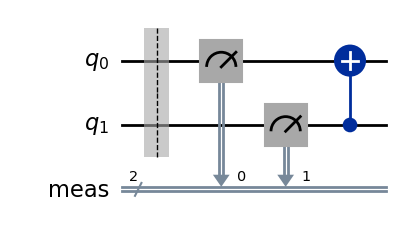

In [ ]:
single_qubit.cx(1,0)
single_qubit.draw(output='mpl')

In [ ]:
# @title Default title text
backend = Aer.get_backend('statevector_simulator')
outputstate = backend.run(single_qubit, shots=1).result().get_statevector()
probs = Statevector(outputstate).probabilities()

print(probs)

[1. 0. 0. 0.]
